# FashionMNIST using MLP model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import nescessary libraries

In [ ]:
# Import nescessary libraries
import random
import numpy as np
import matplotlib.pyplot as plt

# Build model
import torch
import torch.nn as nn
import torch.nn.functional as F

# Training strategy
import torch.optim as optim
# Split data
from torch.utils.data import DataLoader
# Load data
import torchvision.datasets as datasets
# Data preprocessing
import torchvision.transforms as transforms

## Check 'CPU' or 'GPU'

In [ ]:
# Check whether we are using 'GPU' or 'CPU'
device =torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
# Setup for getting the reproducible results

random.seed(1)
np.random.seed(1)
torch.manual_seed(1)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [ ]:
# USE FashionMNIST DATASET
# setup hyperparameters
input_size = 784 #  1*28*28
n_classes = 10 # 10 digits 0,...,9
learning_rate = 0.001 # learning rate on gradient descent
batch_size = 64 # the number of samples in each batch
n_epochs = 50 # the number of training epochs

## Prepare FashionMNIST dataset

In [ ]:
# LOAD data from Google Drive
# Load 'FashionMNIST' dataset
train_dataset = datasets.FashionMNIST(root='/content/drive/MyDrive/10. Toán cho KHMT/datasets' , train =True,
                              transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size,shuffle=True)
test_dataset = datasets.FashionMNIST(root='/content/drive/MyDrive/10. Toán cho KHMT/datasets' ,train=False,transform=transforms.ToTensor(),
                              download=True)
test_loader = DataLoader(dataset= test_dataset, batch_size=batch_size, shuffle=False)


9


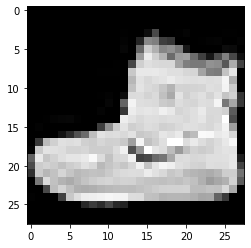

In [ ]:
# Show an image example in training set
image, label = train_dataset[0]
plt.imshow(image.squeeze(), cmap='gray')
print(label)

In [ ]:
# Build a Multi Layer Perceptron model by using Pytorch
# Problem dataset: MNIST
# Build a model has 4 layers include 1 'input' layer, 2 'hidden' layers, 1 'output' layer.
# 'input' layer has 782 nodes (input_size), 'hidden 1' layer has 100 nodes, 'hidden 2' layer has 100 nodes and 'output' layer has 25 nodes.
# The activation of each node in 'input' layer and 'hidden' layer is 'ReLU'
# The actiation of each node in 'output' layer is 'Softmax'
# 'out_features' value of 'output' layer is 10 (n_classes)

## Build MLP model

In [ ]:
#Build a MLP model by using Pytorch
#Approach 1
class MLP(nn.Module):
  def __init__(self, input_size, n_classes):
    super().__init__()
    self.input_layer = nn.Linear(input_size, 100)
    self.hidden_layer_1 = nn.Linear(100,100)
    self.hidden_layer_2 = nn.Linear(100,50)
    self.hidden_layer_3 = nn.Linear(50,25)
    self.output_layer = nn.Linear(25,n_classes)

  def forward(self, X):
    X = self.input_layer(X)
    X = F.relu(X)
    X = self.hidden_layer_1(X)
    X = F.relu(X)
    X = self.hidden_layer_2(X)
    X = F.relu(X)
    X = self.hidden_layer_3(X)
    X = F.relu(X)
    X = self.output_layer(X)
    prob = F.softmax(X, dim=1)
    return prob 

In [ ]:
#Build a MLP model by using Pytorch
#Approach 2
class MLP(nn.Module):
  def __init__(self, input_size, n_classes):
    super().___init__()
    self.model = nn.Sequential(
        nn.Linear(input_size, 100),
        nn.ReLU(),
        nn.Linear(100,100),
        nn.ReLU(),
        nn.Linear(100,50),
        nn.ReLU(),
        nn.Linear(50,25),
        nn.ReLU(),
        nn.Linear(25,n_classes),
        nn.Softmax(dim=1)
    )
  def forward(self, X):
    prob = self.model(X)
    return prob

In [ ]:
#Build a MLP model by using Pytorch
model = MLP(input_size=input_size, n_classes=n_classes).to(device)
print(model)

MLP(
  (input_layer): Linear(in_features=784, out_features=100, bias=True)
  (hidden_layer_1): Linear(in_features=100, out_features=100, bias=True)
  (hidden_layer_2): Linear(in_features=100, out_features=50, bias=True)
  (hidden_layer_3): Linear(in_features=50, out_features=25, bias=True)
  (output_layer): Linear(in_features=25, out_features=10, bias=True)
)


In [ ]:
#Define the loss and the optimization algorithm
criterion = nn.CrossEntropyLoss() # Loss function: Cross entropy
optimizer = optim.Adam(model.parameters(), lr=learning_rate) # Optimizer: Adam

## Training model

In [ ]:
#Training model
for epoch in range(n_epochs):
  for batch_idx, (data, targets) in enumerate(train_loader):
    # Get data to GPU
    data = data.to(device) # Put our images to the GPU if GPU is available
    targets = targets.to(device) # Put our labels to the GPU as well

    # Chage to the correct tensor shape
    # Our data is in the form (batch_size, color_channel, w,h) (64,1,28,28)
    # We need to change it to (batch_size, color_channel* w *h)(64, 784)
    data = data.reshape(data.shape[0],-1)

    # forward pass
    scores = model(data)
    loss = criterion(scores, targets) # Compute the loss/cost function 3 for this batch

    # backward pass
    optimizer.zero_grad() # empty the optimizer first
    loss.backward() # compute gradient dJ/dw's

    # Gradient descent
    optimizer.step()
    
    if (batch_idx+1)%100 == 0:
      print(f'Epoch {epoch+1}/{n_epochs}, Batch {batch_idx+1}, Loss: {loss.item():.2f}')

Epoch 1/50, Batch 100, Loss: 1.92
Epoch 1/50, Batch 200, Loss: 1.72
Epoch 1/50, Batch 300, Loss: 1.78
Epoch 1/50, Batch 400, Loss: 1.76
Epoch 1/50, Batch 500, Loss: 1.81
Epoch 1/50, Batch 600, Loss: 1.76
Epoch 1/50, Batch 700, Loss: 1.72
Epoch 1/50, Batch 800, Loss: 1.84
Epoch 1/50, Batch 900, Loss: 1.78
Epoch 2/50, Batch 100, Loss: 1.69
Epoch 2/50, Batch 200, Loss: 1.71
Epoch 2/50, Batch 300, Loss: 1.76
Epoch 2/50, Batch 400, Loss: 1.72
Epoch 2/50, Batch 500, Loss: 1.73
Epoch 2/50, Batch 600, Loss: 1.73
Epoch 2/50, Batch 700, Loss: 1.65
Epoch 2/50, Batch 800, Loss: 1.66
Epoch 2/50, Batch 900, Loss: 1.67
Epoch 3/50, Batch 100, Loss: 1.76
Epoch 3/50, Batch 200, Loss: 1.64
Epoch 3/50, Batch 300, Loss: 1.68
Epoch 3/50, Batch 400, Loss: 1.67
Epoch 3/50, Batch 500, Loss: 1.63
Epoch 3/50, Batch 600, Loss: 1.67
Epoch 3/50, Batch 700, Loss: 1.77
Epoch 3/50, Batch 800, Loss: 1.70
Epoch 3/50, Batch 900, Loss: 1.69
Epoch 4/50, Batch 100, Loss: 1.60
Epoch 4/50, Batch 200, Loss: 1.66
Epoch 4/50, Ba

## Performance Evaluation

In [ ]:
# Performance Evaluation
def get_accuracy(loader, model):
  if loader.dataset.train:
    print('Getting accuracy on training data.')
  else:
    print('Getting accuracy on testing data.')
  n_corrects = 0
  n_samples = 0
  model.eval() # put our model to evaluation mode
  with torch.no_grad():
    for x,y in loader:
      x = x.to(device)
      y = y.to(device)
      x = x.reshape(x.shape[0], -1)

      #forward
      scores = model(x) # scores 64 x 10
      _, y_pred = scores.max(1)
      n_corrects += (y_pred == y).sum()
      n_samples += y_pred.size(0)

    print(f'We got {n_corrects}/{n_samples} correct. Accuracy = {float(n_corrects)/float(n_samples)* 100.0:.2f}')
  model.train() # put our model to train mode again

In [ ]:
# Performance Evaluation
get_accuracy(train_loader, model)
get_accuracy(test_loader, model)

Getting accuracy on training data.
We got 52954/60000 correct. Accuracy = 88.26
Getting accuracy on testing data.
We got 8619/10000 correct. Accuracy = 86.19


# FashionMNIST using LeNet5 model

## Import nescessary libraries

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

## Check 'CPU' or 'GPU'

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
random.seed(1)
np.random.seed(1)
torch.manual_seed(1)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [ ]:
# Hyperparameters

n_classes = 10
learning_rate = 0.001
batch_size = 64
n_epochs = 50

In [ ]:
transforms = transforms.Compose([transforms.Resize((32,32)),transforms.ToTensor()])

## Prepare FashionMNIST dataset

In [ ]:
# LOAD data from Google Drive
# Load 'FashionMNIST' dataset
train_dataset = datasets.FashionMNIST(root='/content/drive/MyDrive/10. Toán cho KHMT/datasets' , train =True,
                              transform=transforms, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size,shuffle=True)
test_dataset = datasets.FashionMNIST(root='/content/drive/MyDrive/10. Toán cho KHMT/datasets' ,train=False,transform=transforms,
                              download=True)
test_loader = DataLoader(dataset= test_dataset, batch_size=batch_size, shuffle=False)


## Build LeNet5 model

In [ ]:
# Build LeNet5 by using Pytorch
class LeNet5(nn.Module):
  def __init__(self, n_classes):
    super().__init__()
    self.model = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride =1),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2),
        nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2),
        nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1),
        nn.Tanh(),
        nn.Flatten(),
        nn.Linear(in_features=120, out_features=84),
        nn.Tanh(),
        nn.Linear(in_features= 84, out_features=n_classes),
        nn.Softmax(dim=1)
    )
  def forward(self, X):
    prob = self.model(X)
    return prob

In [ ]:
model = LeNet5(n_classes=n_classes).to(device)
print(model)

LeNet5(
  (model): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (7): Tanh()
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=120, out_features=84, bias=True)
    (10): Tanh()
    (11): Linear(in_features=84, out_features=10, bias=True)
    (12): Softmax(dim=1)
  )
)


In [ ]:
# Define the loss and the optimization algorithm

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr= learning_rate)

## Training model

In [ ]:
#Training model

for epoch in range(n_epochs):
  for batch_idx, (data, targets) in enumerate(train_loader):

    data = data.to(device)
    targets = targets.to(device)

    scores = model(data)
    loss = criterion(scores, targets)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    if(batch_idx+1)% 100 ==0:
      print(f'Epoch {epoch+1}/{n_epochs}, Batch {batch_idx+1}, Loss: {loss.item():.2f}')

Epoch 1/50, Batch 100, Loss: 1.86
Epoch 1/50, Batch 200, Loss: 1.74
Epoch 1/50, Batch 300, Loss: 1.75
Epoch 1/50, Batch 400, Loss: 1.61
Epoch 1/50, Batch 500, Loss: 1.78
Epoch 1/50, Batch 600, Loss: 1.67
Epoch 1/50, Batch 700, Loss: 1.72
Epoch 1/50, Batch 800, Loss: 1.64
Epoch 1/50, Batch 900, Loss: 1.63
Epoch 2/50, Batch 100, Loss: 1.62
Epoch 2/50, Batch 200, Loss: 1.64
Epoch 2/50, Batch 300, Loss: 1.64
Epoch 2/50, Batch 400, Loss: 1.67
Epoch 2/50, Batch 500, Loss: 1.62
Epoch 2/50, Batch 600, Loss: 1.60
Epoch 2/50, Batch 700, Loss: 1.61
Epoch 2/50, Batch 800, Loss: 1.65
Epoch 2/50, Batch 900, Loss: 1.60
Epoch 3/50, Batch 100, Loss: 1.61
Epoch 3/50, Batch 200, Loss: 1.60
Epoch 3/50, Batch 300, Loss: 1.59
Epoch 3/50, Batch 400, Loss: 1.60
Epoch 3/50, Batch 500, Loss: 1.64
Epoch 3/50, Batch 600, Loss: 1.58
Epoch 3/50, Batch 700, Loss: 1.64
Epoch 3/50, Batch 800, Loss: 1.58
Epoch 3/50, Batch 900, Loss: 1.59
Epoch 4/50, Batch 100, Loss: 1.69
Epoch 4/50, Batch 200, Loss: 1.55
Epoch 4/50, Ba

## Performance Evaluation

In [ ]:
def get_accracy(loader, model):
  if loader.dataset.train:
    print('Getting accuracy on training data.')
  else:
    print('Getting accuracy on testing data.')
  
  n_corrects = 0
  n_samples = 0
  model.eval()

  with torch.no_grad():
    for x,y in loader:
      x = x.to(device)
      y = y.to(device)

      scores = model(x)
      _,y_pred = scores.max(1)
      n_corrects += (y_pred == y).sum()
      n_samples += y_pred.size(0)

    print(f'We got {n_corrects}/{n_samples} correct. Accuracy = {float(n_corrects)/float(n_samples)* 100.0:.2f}')
  model.train()

In [ ]:
get_accracy(train_loader,model)
get_accracy(test_loader, model)

Getting accuracy on training data.
We got 56185/60000 correct. Accuracy = 93.64
Getting accuracy on testing data.
We got 8820/10000 correct. Accuracy = 88.20


# CIFAR10 using MLP model

## Import nescessary libraries

In [27]:
# Import nescessary libraries
import random
import numpy as np
import matplotlib.pyplot as plt

# Build model
import torch
import torch.nn as nn
import torch.nn.functional as F

# Training strategy
import torch.optim as optim
# Split data
from torch.utils.data import DataLoader
# Load data
import torchvision.datasets as datasets
# Data preprocessing
import torchvision.transforms as transforms

## Check 'CPU' or 'GPU'

In [28]:
# Check whether we are using 'GPU' or 'CPU'
device =torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [29]:
# Setup for getting the reproducible results

random.seed(1)
np.random.seed(1)
torch.manual_seed(1)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [36]:
# USE CIFAR10 DATASET
# setup hyperparameters
input_size = 3072 #  3*32*32
n_classes = 10 # 10 class 0,...,9
learning_rate = 0.001 # learning rate on gradient descent
batch_size = 64 # the number of samples in each batch
n_epochs = 50 # the number of training epochs

## Prepare CIFAR10 dataset

In [31]:
# LOAD data from Google Drive
# Load 'CIFAR10' dataset
train_dataset = datasets.CIFAR10(root='/content/drive/MyDrive/10. Toán cho KHMT/datasets' , train =True,
                              transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size,shuffle=True)
test_dataset = datasets.CIFAR10(root='/content/drive/MyDrive/10. Toán cho KHMT/datasets' ,train=False,transform=transforms.ToTensor(),
                              download=True)
test_loader = DataLoader(dataset= test_dataset, batch_size=batch_size, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


9
truck


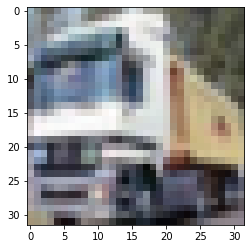

In [6]:
# Show an image example in training set
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
image, label = train_dataset[1]
plt.imshow(image.permute((1,2,0)), cmap='gray')
print(label)
print(classes[label])

## Build MLP model

In [37]:
#Build a MLP model by using Pytorch
#Approach 2
class MLP(nn.Module):
    def __init__(self, input_size, n_classes):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 1024), nn.ReLU(), #Input layer
            nn.Linear(1024, 512), nn.ReLU(), #Hidden Layer 1 
            nn.Linear(512, 256), nn.ReLU(), #Hidden Layer 2
            nn.Linear(256, 64), nn.ReLU(), #Hidden Layer 3 
            nn.Linear(64, n_classes), nn.Softmax(dim =1), #Output Layer 3 
        )
    def forward(self, X):
        prob = self.model(X)
        return prob

In [38]:
#Build a MLP model by using Pytorch
model = MLP(input_size=input_size, n_classes=n_classes).to(device)
print(model)

MLP(
  (model): Sequential(
    (0): Linear(in_features=3072, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=64, bias=True)
    (7): ReLU()
    (8): Linear(in_features=64, out_features=10, bias=True)
    (9): Softmax(dim=1)
  )
)


In [39]:
#Define the loss and the optimization algorithm
criterion = nn.CrossEntropyLoss() # Loss function: Cross entropy
optimizer = optim.Adam(model.parameters(), lr=learning_rate) # Optimizer: Adam

## Training model

In [40]:
#Training model
for epoch in range(n_epochs):
  for batch_idx, (data, targets) in enumerate(train_loader):
    # Get data to GPU
    data = data.to(device) # Put our images to the GPU if GPU is available
    targets = targets.to(device) # Put our labels to the GPU as well

    # Chage to the correct tensor shape
    data = data.reshape(data.shape[0],-1)

    # forward pass
    scores = model(data)
    loss = criterion(scores, targets) # Compute the loss/cost function 3 for this batch

    # backward pass
    optimizer.zero_grad() # empty the optimizer first
    loss.backward() # compute gradient dJ/dw's

    # Gradient descent
    optimizer.step()
    
    if (batch_idx+1)%100 == 0:
      print(f'Epoch {epoch+1}/{n_epochs}, Batch {batch_idx+1}, Loss: {loss.item():.2f}')

Epoch 1/50, Batch 100, Loss: 2.27
Epoch 1/50, Batch 200, Loss: 2.26
Epoch 1/50, Batch 300, Loss: 2.22
Epoch 1/50, Batch 400, Loss: 2.22
Epoch 1/50, Batch 500, Loss: 2.19
Epoch 1/50, Batch 600, Loss: 2.18
Epoch 1/50, Batch 700, Loss: 2.21
Epoch 2/50, Batch 100, Loss: 2.18
Epoch 2/50, Batch 200, Loss: 2.14
Epoch 2/50, Batch 300, Loss: 2.11
Epoch 2/50, Batch 400, Loss: 2.19
Epoch 2/50, Batch 500, Loss: 2.09
Epoch 2/50, Batch 600, Loss: 2.11
Epoch 2/50, Batch 700, Loss: 2.10
Epoch 3/50, Batch 100, Loss: 2.14
Epoch 3/50, Batch 200, Loss: 2.12
Epoch 3/50, Batch 300, Loss: 2.18
Epoch 3/50, Batch 400, Loss: 2.19
Epoch 3/50, Batch 500, Loss: 2.08
Epoch 3/50, Batch 600, Loss: 2.14
Epoch 3/50, Batch 700, Loss: 2.15
Epoch 4/50, Batch 100, Loss: 2.06
Epoch 4/50, Batch 200, Loss: 2.15
Epoch 4/50, Batch 300, Loss: 2.08
Epoch 4/50, Batch 400, Loss: 2.06
Epoch 4/50, Batch 500, Loss: 2.12
Epoch 4/50, Batch 600, Loss: 2.10
Epoch 4/50, Batch 700, Loss: 2.15
Epoch 5/50, Batch 100, Loss: 2.08
Epoch 5/50, Ba

## Performance Evaluation

In [41]:
# Performance Evaluation
def get_accuracy(loader, model):
  if loader.dataset.train:
    print('Getting accuracy on training data.')
  else:
    print('Getting accuracy on testing data.')
  n_corrects = 0
  n_samples = 0
  model.eval() # put our model to evaluation mode
  with torch.no_grad():
    for x,y in loader:
      x = x.to(device)
      y = y.to(device)
      x = x.reshape(x.shape[0], -1)

      #forward
      scores = model(x) # scores 64 x 10
      _, y_pred = scores.max(1)
      n_corrects += (y_pred == y).sum()
      n_samples += y_pred.size(0)

    print(f'We got {n_corrects}/{n_samples} correct. Accuracy = {float(n_corrects)/float(n_samples)* 100.0:.2f}')
  model.train() # put our model to train mode again

In [42]:
# Performance Evaluation
get_accuracy(train_loader, model)
get_accuracy(test_loader, model)

Getting accuracy on training data.
We got 22081/50000 correct. Accuracy = 44.16
Getting accuracy on testing data.
We got 4203/10000 correct. Accuracy = 42.03


# CIFAR10 using LeNet5 model

## Import nescessary libraries

In [43]:
# Import necessary libraries

import random
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

## Check 'CPU' or 'GPU'

In [44]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [45]:
random.seed(1)
np.random.seed(1)
torch.manual_seed(1)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [46]:
# Hyperparameters

n_classes = 10
learning_rate = 0.001
batch_size = 64
n_epochs = 50

## Prepare CIFAR10 dataset

In [47]:
# LOAD data from Google Drive
# Load 'CIFAR10' dataset
train_dataset = datasets.CIFAR10(root='/content/drive/MyDrive/10. Toán cho KHMT/datasets' , train =True,
                              transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size,shuffle=True)
test_dataset = datasets.CIFAR10(root='/content/drive/MyDrive/10. Toán cho KHMT/datasets' ,train=False,transform=transforms.ToTensor(),
                              download=True)
test_loader = DataLoader(dataset= test_dataset, batch_size=batch_size, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


## Build LeNet5 model

In [48]:
# Build LeNet5 by using Pytorch
class LeNet5(nn.Module):
  def __init__(self, n_classes):
    super().__init__()
    self.model = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride =1),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2),
        nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2),
        nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1),
        nn.Tanh(),
        nn.Flatten(),
        nn.Linear(in_features=120, out_features=84),
        nn.Tanh(),
        nn.Linear(in_features= 84, out_features=n_classes),
        nn.Softmax(dim=1)
    )
  def forward(self, X):
    prob = self.model(X)
    return prob

In [49]:
model = LeNet5(n_classes=n_classes).to(device)
print(model)

LeNet5(
  (model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (7): Tanh()
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=120, out_features=84, bias=True)
    (10): Tanh()
    (11): Linear(in_features=84, out_features=10, bias=True)
    (12): Softmax(dim=1)
  )
)


In [50]:
# Define the loss and the optimization algorithm

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr= learning_rate)

## Training model

In [51]:
#Training model

for epoch in range(n_epochs):
  for batch_idx, (data, targets) in enumerate(train_loader):

    data = data.to(device)
    targets = targets.to(device)

    scores = model(data)
    loss = criterion(scores, targets)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    if(batch_idx+1)% 100 ==0:
      print(f'Epoch {epoch+1}/{n_epochs}, Batch {batch_idx+1}, Loss: {loss.item():.2f}')

Epoch 1/50, Batch 100, Loss: 2.18
Epoch 1/50, Batch 200, Loss: 2.15
Epoch 1/50, Batch 300, Loss: 2.16
Epoch 1/50, Batch 400, Loss: 2.06
Epoch 1/50, Batch 500, Loss: 2.13
Epoch 1/50, Batch 600, Loss: 1.97
Epoch 1/50, Batch 700, Loss: 2.13
Epoch 2/50, Batch 100, Loss: 2.00
Epoch 2/50, Batch 200, Loss: 2.05
Epoch 2/50, Batch 300, Loss: 2.14
Epoch 2/50, Batch 400, Loss: 2.09
Epoch 2/50, Batch 500, Loss: 2.00
Epoch 2/50, Batch 600, Loss: 2.15
Epoch 2/50, Batch 700, Loss: 2.02
Epoch 3/50, Batch 100, Loss: 1.99
Epoch 3/50, Batch 200, Loss: 2.02
Epoch 3/50, Batch 300, Loss: 1.94
Epoch 3/50, Batch 400, Loss: 2.07
Epoch 3/50, Batch 500, Loss: 2.12
Epoch 3/50, Batch 600, Loss: 2.01
Epoch 3/50, Batch 700, Loss: 1.99
Epoch 4/50, Batch 100, Loss: 1.99
Epoch 4/50, Batch 200, Loss: 2.06
Epoch 4/50, Batch 300, Loss: 1.95
Epoch 4/50, Batch 400, Loss: 1.97
Epoch 4/50, Batch 500, Loss: 2.06
Epoch 4/50, Batch 600, Loss: 1.97
Epoch 4/50, Batch 700, Loss: 1.93
Epoch 5/50, Batch 100, Loss: 2.02
Epoch 5/50, Ba

## Performance Evaluation

In [52]:
def get_accracy(loader, model):
  if loader.dataset.train:
    print('Getting accuracy on training data.')
  else:
    print('Getting accuracy on testing data.')
  
  n_corrects = 0
  n_samples = 0
  model.eval()

  with torch.no_grad():
    for x,y in loader:
      x = x.to(device)
      y = y.to(device)

      scores = model(x)
      _,y_pred = scores.max(1)
      n_corrects += (y_pred == y).sum()
      n_samples += y_pred.size(0)

    print(f'We got {n_corrects}/{n_samples} correct. Accuracy = {float(n_corrects)/float(n_samples)* 100.0:.2f}')
  model.train()

In [53]:
get_accracy(train_loader,model)
get_accracy(test_loader, model)

Getting accuracy on training data.
We got 36548/50000 correct. Accuracy = 73.10
Getting accuracy on testing data.
We got 5284/10000 correct. Accuracy = 52.84
